# [NTDS'18] milestone 2: network models
[ntds'18]: https://github.com/mdeff/ntds_2018

[Hermina Petric Maretic](https://people.epfl.ch/hermina.petricmaretic), [EPFL LTS4](https://lts4.epfl.ch)

## Students

* Team: 3
* Students: Baptiste Hériard-Dubreuil, Jean-Baptiste Membrado, Guilhem Noiraud, Amaury Véron
* Dataset: Flight routes

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* In the first part, you cannot import any other library than we imported. In the second part, you are allowed to import any library you want.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective

The purpose of this milestone is to explore various random network models, analyse their properties and compare them to your network. In the first part of the milestone you will implement two random graph models and try to fit them to your network. In this part you are not allowed to use any additional package. In the second part of the milestone you will choose a third random graph model that you think shares some properties with your network. You will be allowed to use additional packages to construct this network, but you must explain your network choice. Finally, make your code as clean as possible, and keep your textual answers short.

## Part 0

Import the adjacency matrix of your graph that you constructed in milestone 1, as well as the number of nodes and edges of your network.

In [1]:
import numpy as np
adjacency =  np.load("adjacency.npy")
n_nodes =  len(adjacency[0])
n_edges =  sum(sum(adjacency))/2 #each node is counted two times

## Part 1

**For the computation of this part of the milestone you are only allowed to use the packages that have been imported in the cell below.**

In [2]:
%matplotlib inline

import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

### Question 1

Create a function that constructs an Erdős–Rényi graph.

In [3]:
def erdos_renyi(n, p, seed=None):
    """Create an instance from the Erdos-Renyi graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    p: float
        Edge probability. A number between 0 and 1.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    
    np.random.seed(seed)
    adjacency = np.random.rand(n,n)
    
    for i in range(n):
        for j in range(n):
            if adjacency[i][j]<p:
                adjacency[i][j] = 1
            else:
                adjacency[i][j] = 0
    
    return adjacency

Text(0.5,1.05,'Erdos-Renyi (5, 0.6)')

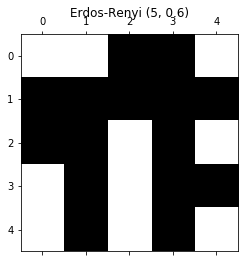

In [4]:
er = erdos_renyi(5, 0.6, 9765)
plt.spy(er)
plt.title('Erdos-Renyi (5, 0.6)')

Text(0.5,1.05,'Erdos-Renyi (10, 0.4)')

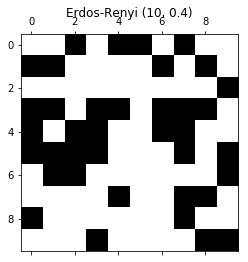

In [5]:
er = erdos_renyi(10, 0.4, 7648)
plt.spy(er)
plt.title('Erdos-Renyi (10, 0.4)')

### Question 2

Use the function to create a random Erdos-Renyi graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

Text(0.5,1.05,'Erdös-Rényi graph')

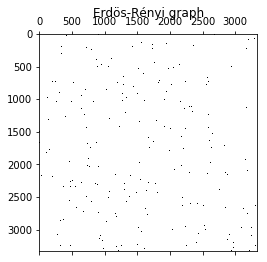

In [6]:
n_edges_max = n_nodes*(n_nodes-1)/2
er_planes = erdos_renyi(n_nodes, n_edges/n_edges_max,5000) #we put a seed to have less changes while doing commits in GitHub
plt.spy(er_planes)
plt.title('Erdös-Rényi graph')

**The first parameter of our function is the number of nodes of the adjacency matrix we created in the last milestone. To set the probability of an edge (second parameter of the function), we took the ratio of the number of edges in our adjacency matrix divided by the maximum number of edges for an undirected graph.**

### Question 3

Create a function that constructs a Barabási-Albert graph.

In [7]:
def barabasi_albert(n, m, seed=None):
    """Create an instance from the Barabasi-Albert graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    m: int
        Number of edges to attach from a new node to existing nodes.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    
    # BA model uses preferential attachment
    # We begin with m nodes that are linked and keep adding new nodes until we have a graph of size n
    # At each step, we add m edges to existing nodes
    
    np.random.seed(seed)
    
    adjacency = np.zeros((n, n))
    degrees = np.zeros(n)
    total_degrees = 0
    
    
    # Initially, we add m nodes to the model (2 nodes if m==1)
    if m == 1:
        initial_nodes_number = 2
    elif m > 1:
        initial_nodes_number = m
    else:
        return "m is not valid"

    #Those nodes are all connected
    for i in range(initial_nodes_number):
        node_degree = 0
        for j in range(initial_nodes_number):
            if (i != j):
                adjacency[i, j] = 1
                node_degree += 1
                total_degrees += 1
        degrees[i] = node_degree
    
    #Addition of the n-m missing nodes to the graph
    for node in range(initial_nodes_number,n):
        connected_nodes = []
        while len(connected_nodes)<m:
            rnd = np.random.randint(1,total_degrees)
            s = 0
            for i in range(node):
                s += degrees[i]
                if rnd <= s:
                    potential_node_to_connect = i
                    #test if the founded candidate has already been visited or not
                    if potential_node_to_connect in connected_nodes:
                        continue
                    else:
                        break
            #Creation of the new edge between two nodes
            connected_node = potential_node_to_connect
            connected_nodes.append(connected_node)
            adjacency[node,connected_node] = 1
            adjacency[connected_node,node] = 1
            degrees[connected_node] += 1
            degrees[node] += 1
        total_degrees += 2*m
    
    return adjacency

Text(0.5,1.05,'Barabasi-Albert (5, 1)')

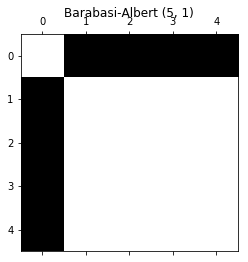

In [8]:
ba = barabasi_albert(5, 1, 9087)
plt.spy(ba)
plt.title('Barabasi-Albert (5, 1)')

Text(0.5,1.05,'Barabasi-Albert (10, 2)')

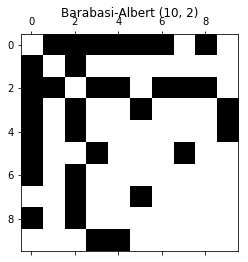

In [9]:
ba = barabasi_albert(10, 2, 8708)
plt.spy(ba)
plt.title('Barabasi-Albert (10, 2)')

### Question 4

Use the function to create a random Barabási-Albert graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

Text(0.5,1.05,'Barabási-Albert graph')

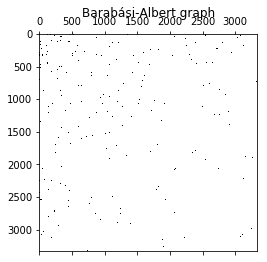

In [10]:
ba_planes = barabasi_albert(n_nodes, 6, 5001) #we put a seed to have less changes while doing commits in GitHub
plt.spy(ba_planes)
plt.title('Barabási-Albert graph')

**The final number of nodes corresponds to n_nodes, of course. Since the mean number of edges per node is 11.45, we have to find this in our model. One edge in Barabasi-Albert counts two times so we have to take the nearest integer of 11.45/2 which is 6.**

### Question 5

Compare the number of edges in all three networks (your real network, the Erdős–Rényi network, and the Barabási-Albert netowk).

In [11]:
n_edges_er = sum(sum(er_planes))
n_edges_ba = sum(sum(ba_planes))
delta_er = (n_edges_er-n_edges*2)/(n_edges*2)
delta_ba = (n_edges_ba-n_edges*2)/(n_edges*2)
print("There is a ",round(delta_er*100,2),"% difference between the number of edges in our matrix and the Erdös-Rényi one.")
print("There is a ",round(delta_ba*100,2),"% difference between the number of edges in our matrix and the Barabási-Albert one.")

There is a  -0.17 % difference between the number of edges in our matrix and the Erdös-Rényi one.
There is a  4.68 % difference between the number of edges in our matrix and the Barabási-Albert one.


### Question 6

Implement a function that computes the [Kullback–Leibler (KL) divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between two probability distributions.
We'll use it to compare the degree distributions of networks.

In [12]:
def kl_divergence(p, q):
    """Compute the KL divergence between probability distributions of degrees of two networks.
    
    Parameters
    ----------
    p: np.array
        Probability distribution of degrees of the 1st graph.
    q: np.array
        Probability distribution of degrees of the 2nd graph.
    
    Returns
    -------
    kl
        The KL divergence between the two distributions.
    """
    kl = 0
    for i in range(len(p)):
        if p[i] != 0 and q[i] != 0:
            kl += p[i] * np.log(p[i]/q[i])
    
    return kl

In [13]:
p_test = np.array([0.2, 0.2, 0.2, 0.4])
q_test = np.array([0.3, 0.3, 0.1, 0.3])
kl_divergence(p_test, q_test)

0.09151622184943575

### Question 7

Compare the degree distribution of your network to each of the two synthetic ones, in terms of KL divergence. **Hint:** Make sure you normalise your degree distributions to make them valid probability distributions.

In [14]:
#Computation of the degrees
degree_adjacency = np.zeros(n_nodes, dtype=int)
degree_er = np.zeros(n_nodes, dtype=int)
degree_ba = np.zeros(n_nodes, dtype=int)

for i in range(n_nodes):
    degree_adjacency[i] = sum(adjacency[i])
    degree_er[i] = sum(er_planes[i])
    degree_ba[i] = sum(ba_planes[i])

q=1/7
N = int(q*25) + 1  # Compute the degree max
p_adj = np.zeros(N)
p_er = np.zeros(N)
p_ba = np.zeros(N)

for i in range(n_nodes):
    p_adj[int(min(q*degree_adjacency[i], q*25))] += 1   # We divide degrees in 4 intervalls to have non zero probabilities.
    p_er[int(min(q*degree_er[i], q*25))] += 1           # We have to handle the fact that E-R has no degree > 25 
    p_ba[int(min(q*degree_ba[i], q*25))] += 1           # (by observation) and that B-A has no degree < 6 (by construction)
    
p_adj /= sum(p_adj)
p_er /= sum(p_er)
p_ba /= sum(p_ba)

#KL divergence computation
print('KL divergence between reference and Erdös-Rényi model = ',kl_divergence(p_adj, p_er))
print('KL divergence between reference and Barabási-Albert model = ',kl_divergence(p_adj, p_ba))

KL divergence between reference and Erdös-Rényi model =  1.7911714526058016
KL divergence between reference and Barabási-Albert model =  0.5542748370941034


### Question 8

Plot the degree distribution historgrams for all three networks. Are they consistent with the KL divergence results? Explain.

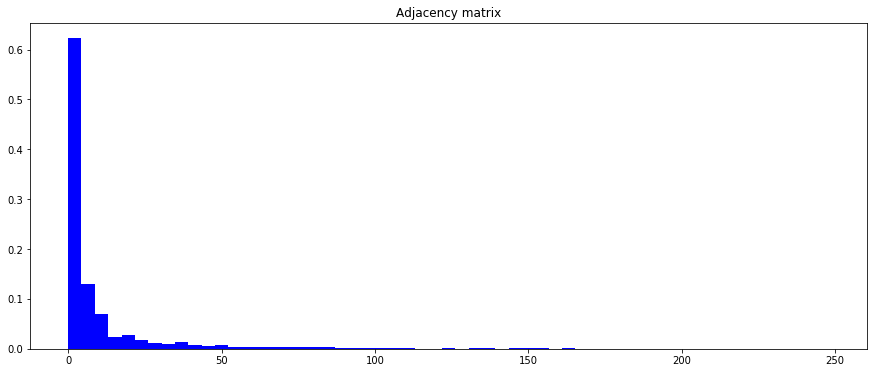

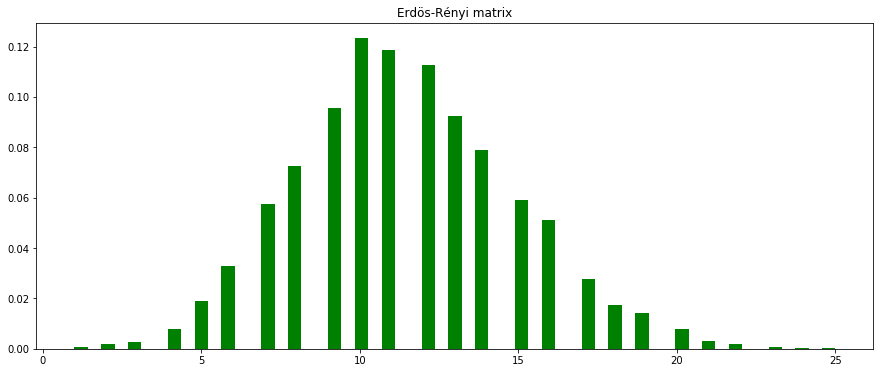

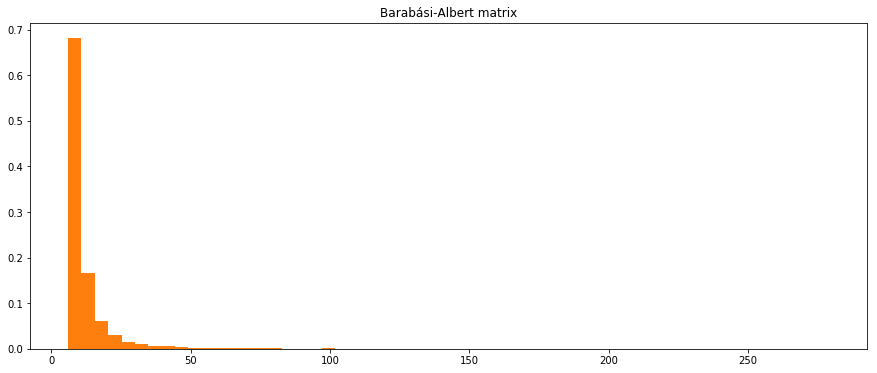

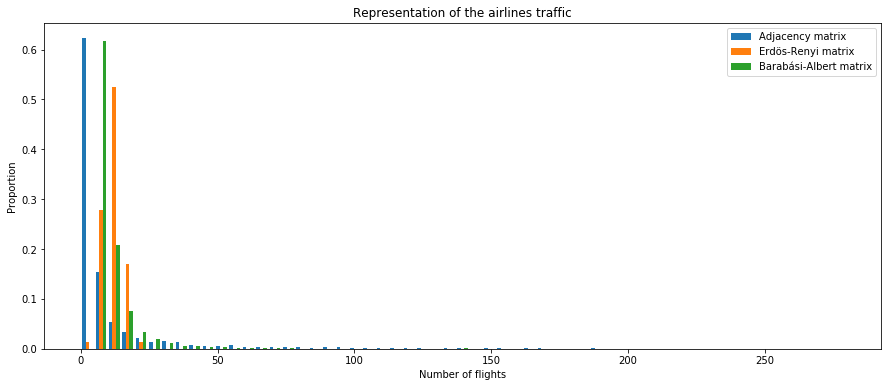

In [15]:
#Computation of the weights
weights_adjacency = np.ones_like(degree_adjacency) / float(n_nodes)
weights_er = np.ones_like(degree_er) / float(n_nodes)
weights_ba = np.ones_like(degree_ba) / float(n_nodes)

#Plot
#Just adj
plt.figure(figsize=(15,6))
plt.hist(degree_adjacency, weights=weights_adjacency, bins=int(np.sqrt(n_nodes)), color='b')
plt.title('Adjacency matrix')
plt.show()

#Just ER
plt.figure(figsize=(15,6))
plt.hist(degree_er, weights=weights_er, bins=int(np.sqrt(n_nodes)), color='g')
plt.title('Erdös-Rényi matrix')
plt.show()

#Just BA
plt.figure(figsize=(15,6))
plt.hist(degree_ba, weights=weights_ba, bins=int(np.sqrt(n_nodes)), color='tab:orange')
plt.title('Barabási-Albert matrix')
plt.show()

#All together
plt.figure(figsize=(15,6))
plt.hist([degree_adjacency, degree_er,degree_ba], weights=[weights_adjacency, weights_er,weights_ba], bins=int(np.sqrt(n_nodes)), label=['Adjacency matrix','Erdös-Renyi matrix','Barabási-Albert matrix'])
plt.legend(loc='upper right')
plt.title('Representation of the airlines traffic')
plt.ylabel('Proportion');
plt.xlabel('Number of flights');
plt.show()

**The histogram from the Barabási-Albert graph is much closer to the original graph than the Erdös-Rényi graph.This is consistent with the computed KL divergences.**

### Question 9

Imagine you got equal degree distributions. Would that guarantee you got the same graph? Explain.

**Equal degree distributions do not mean at all the same graph because we only have an information on the number of connexions per node, but we don't know how they are made. A simple counter-example can show the difference. In an hexagone, all nodes have two links. Two triangles will show the exact same degree distribution (6 nodes with two links each), but the graphs are very different.**

## Part 2

**You are allowed to use any additional library here (e.g., NetworkX, PyGSP, etc.).** Be careful not to include something here and use it in part 1!

In [16]:
import networkx as nx

### Question 10

Choose a random network model that fits you network well. Explain your choice. 

**Hint:** Check lecture notes for different network models and their properties. Your choice should be made based on at least one property you'd expect to be similar.

**The graph we study clearly is a scale-free graph : the degree distribution follows a power-law distribution.**

**One of the simplest random graph models that create a scale-free random graph is the Barabasi-Albert model. The degree distribution will be similar as in our graph. However, there are two problems with this model : the $\gamma$ is always equal to 3, and the clustering coefficient is rather low.**

**For the first problem, it is hard to have an algorithm where the value of $\gamma$ is tunable, except if we consider a random graph made to fit exactly a given degree distribution. For the second one, we use an improvement of the classic BA algorithm done by Petter Holme and Beom Jun Kim that allows tunable clustering coefficient.**

**Here is the link to the related paper from Holme and Kim : http://www.uvm.edu/pdodds/files/papers/others/2002/holme2002a.pdf**

**In the end of this milestone, you can find an appendix where we coded another random graph model based on a power-law model.**

### Question 11

Explain (in short) how the chosen model works.

**The basis of this algorithm is the Barabási-Albert model : each step of the algorithm consists in adding a node and to connect it to m already existing nodes ith preferential attachment such as the more edges a node has, the more probable the new node will be connected to it.**

**The main point of the Holme and Kim improvement is the triad formation step. When we have to add an edge between a new node and existing ones, we perform either a step of Preferential Attachment that adds an edge between the new node and an already existing node, either a Triad Formation step : if we connected $u$ and $v$ during previous Preferential Attachment, where $v$ is the new node, then we choose a neighbour of $u$ and connect $v$ to it. By doing this, we create a triad, and that increases the clustering coefficient. The choice between performing a PA step or a TF step depends on a probability : this probability controls the proportion of TF steps we want to do over PA steps.**

**This algorithm is interesting as it preserves the scale-free characteristic of the BA model, but adds the tuning of the $\gamma$ parameter.**

### Question 12

Create a random graph from that model, such that the number of nodes is the same as in your graph.

**The powerlaw_cluster_graph function in networkx creates a random graph according to the improved version of the BA model mentionned in questions 10 and 11.**

In [87]:
pl_graph = nx.powerlaw_cluster_graph(n_nodes, 6, 0.9999, seed=5001)

In [88]:
nx_pl_degrees = sorted([d for n, d in pl_graph.degree()], reverse=True)
print('Difference number of edges with adjacency: ', (sum(nx_pl_degrees)-n_edges*2)/(n_edges*2)*100, ' %')

Difference number of edges with adjacency:  4.614900809769648  %


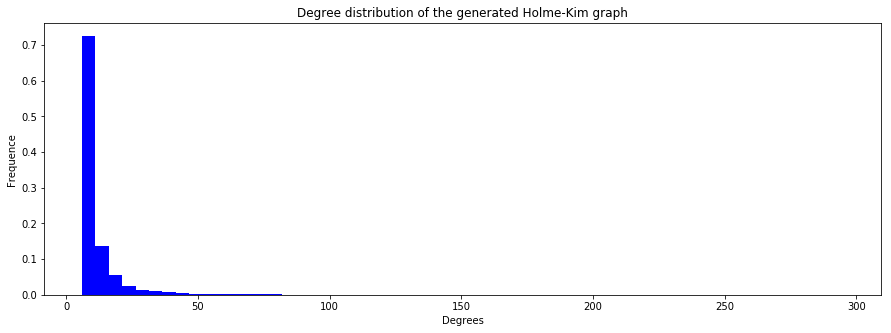

In [89]:
#Computation of the weights
weights_graph = np.ones_like(nx_pl_degrees) / float(n_nodes)

plt.figure(figsize=(15,5))
plt.hist(nx_pl_degrees, weights=weights_graph, bins=int(np.sqrt(n_nodes)), color='b')
plt.title('Degree distribution of the generated Holme-Kim graph')
plt.xlabel('Degrees')
plt.ylabel('Frequence')
plt.show()

### Question 13

Check the properties you expected to be similar, and compare to your network.

**First, let's fit a power-law model to the graph we generated and then compare the parameters of the model with those of our flight routes graph.**

array([-2.88675625, 12.01151949])

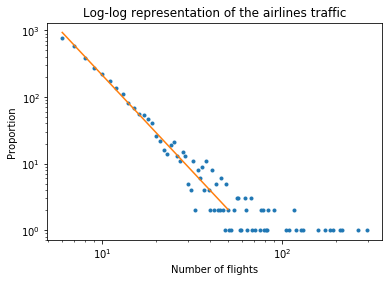

In [90]:
# Here we compute the parameters of the power law representing our distribution
degrees_unique_power, degrees_freq_power = np.unique(nx_pl_degrees, return_counts=True)

idx_log = [k for k in range(1, len(degrees_unique_power)) if (degrees_unique_power[k] > 1
                                                     and degrees_unique_power[k] < 50    #Avoid border effects
                                                     and degrees_freq_power[k] > 0) ]
# Linear regression
p_power = np.polyfit(np.log(degrees_unique_power[idx_log]), np.log(degrees_freq_power[idx_log]), 1)

plt.plot(degrees_unique_power, degrees_freq_power, '.')
plt.plot(degrees_unique_power[idx_log_power], np.exp(p_power[0]*np.log(degrees_unique_power[idx_log_power]) + p_power[1]))
plt.xscale('log')
plt.yscale('log')
plt.title('Log-log representation of the airlines traffic')
plt.ylabel('Proportion');
plt.xlabel('Number of flights');

p_power #Parameters of the power law, gamma is the first coefficient.

**In the previous assignment we had array([-1.59209779,  7.58711237]).**

**As said previously, the BA model has a gamma around 3, and we cannot change this parameter easily.**

**Let's measure the KL divergence.**

In [91]:
#Let's first compute the probability distribution of degrees for the new graph

p_power = np.zeros(N)

for i in range(n_nodes):
    p_power[int(min(q*nx_pl_degrees[i], q*25))] += 1
    
p_power /= sum(p_power)

#KL divergence computation
print('KL divergence between reference and Barabási-Albert model generated with NetworkX=',kl_divergence(p_adj, p_power))

#Clustering coefficient
C_average_power = nx.average_clustering(pl_graph)
print('Clustering coefficient:',round(C_average_power, 5))

KL divergence between reference and Barabási-Albert model generated with NetworkX= 0.5995660883794222
Clustering coefficient: 0.38689


**By using the Holme and Kim algorithm, the clustering coefficient is greatly improved.**

**In our flight routes graph, we had an average clustering coefficient equal to 0.494.**

In [51]:
#Connected graph ? No in general
print('The graph is connected:',nx.is_connected(pl_graph))

#Directed graph
print('The graph is undirected:',not(nx.is_directed(pl_graph)))

The graph is connected: True
The graph is undirected: True


Are the results what you expected? Explain.

**The results are good, but the random model does not perfectly fit to the original flight routes matrix.**


**The main problem are the values of the parameters of the corresponding power law.**

In [31]:
#Determination of the connected components
connected = sorted(nx.connected_components(pl_graph), key = len, reverse=True)

In [32]:
print('The biggest component has',len(connected[0]), 'airports') #Size of the largest component
print('And there are',len(connected),'clusters.')

The biggest component has 3333 airports
And there are 1 clusters.


#### Appendix: Home made random network following a power law. Our model follows a power-law model, so we tried to make a random network based on the power law.

In [34]:
def power_law_graph(n_nodes,gamma,max_degree):
    
    """Create a random graph following a power-law.
    
    Parameters
    ----------
    n_nodes: int
        Size of the graph.
    gamma: float
        Coefficient of the power law. Should be greater than 1.
    max degree: int 
        Maximum degree allowed for a node in the graph.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    
    #Creation of a random degree sequence following a truncated power law
    degree_sequence=[]
    while len(degree_sequence)<n_nodes:
        deg = int(nx.utils.powerlaw_sequence(1,gamma)[0])
        if 0<deg<max_degree: #Permits to keep a reasonable degree according to the original model
            degree_sequence.append(deg)
    
    #If the total degree is odd, it is not possible to create a graph
    if sum(degree_sequence)%2 != 0:
        degree_sequence[0]+=1
    
    #Creation of the graph
    graph = nx.configuration_model(degree_sequence, create_using = nx.Graph)
    
    # remove self loops
    graph.remove_edges_from(graph.selfloop_edges())
    
    return graph




#Creation of the graph according to adjacency_matrix data
gamma = 1.59209779
power_graph = power_law_graph(n_nodes,gamma,max(degree_adjacency)+1)

TypeError: is_directed() missing 1 required positional argument: 'self'

**The degree distribution of this model is very close to the airplane traffic, as shown in the degree distribution plot and with the KL divergence (less than 0.001). The number of edges is close but varies. The power law is quite similar to our network. The clustering coefficient is very low (around 0.08) but it is difficult for a random network to have a high clustering coefficient. The graph is not connected and the biggest component has a size similar to the one of the adjacency matrix (around 3300), but the other clusters are almost always only formed with two nodes, what is not representative of the real network.**